<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_3/demo_dog_cat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the Keras libraries and other packages
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
tf.__version__

'2.6.0'

In [4]:
keras.__version__

'2.6.0'

##**Initializing the CNN**

In [5]:
classifier = Sequential()

##**Step 1: Convolution**

In [6]:
classifier.add(Conv2D(filters=32, kernel_size=3, input_shape=(64, 64, 3), activation='relu'))

##**Step 2: Pooling**

In [7]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))

##**Adding second convolutional layer**

In [8]:
classifier.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

##**Step 3: Flattening**

In [9]:
classifier.add(Flatten())

##**Fully connection**

In [10]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [11]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

##**Compiling the CNN**

In [12]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##**Read and pre-process image**

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
trainning_set = train_datagen.flow_from_directory(directory='/content/gdrive/MyDrive/dataset_dog_cat_CNN/training_set',
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 8011 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory(directory='/content/gdrive/MyDrive/dataset_dog_cat_CNN/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=20),
              ModelCheckpoint('model_checkpoint_20082021.h5', save_best_only=True)]

In [19]:
from datetime import datetime

datetime.now()

datetime.datetime(2021, 10, 27, 13, 20, 24, 927545)

In [20]:
history = classifier.fit(trainning_set, epochs=100, validation_data=test_set, callbacks=callbacks)

Epoch 1/100
251/251 [==============================] - 1991s 8s/step - loss: 0.6640 - accuracy: 0.5908 - val_loss: 0.7195 - val_accuracy: 0.5530
Epoch 2/100
251/251 [==============================] - 57s 226ms/step - loss: 0.6036 - accuracy: 0.6710 - val_loss: 0.5945 - val_accuracy: 0.6895
Epoch 3/100
251/251 [==============================] - 56s 224ms/step - loss: 0.5589 - accuracy: 0.7146 - val_loss: 0.5597 - val_accuracy: 0.7175
Epoch 4/100
251/251 [==============================] - 57s 225ms/step - loss: 0.5161 - accuracy: 0.7419 - val_loss: 0.5002 - val_accuracy: 0.7565
Epoch 5/100
251/251 [==============================] - 56s 224ms/step - loss: 0.4831 - accuracy: 0.7625 - val_loss: 0.4843 - val_accuracy: 0.7820
Epoch 6/100
251/251 [==============================] - 56s 224ms/step - loss: 0.4710 - accuracy: 0.7686 - val_loss: 0.6037 - val_accuracy: 0.7390
Epoch 7/100
251/251 [==============================] - 56s 225ms/step - loss: 0.4460 - accuracy: 0.7847 - val_loss: 0.4919 - 

In [21]:
import pandas as pd

history_frame = pd.DataFrame(history.history)

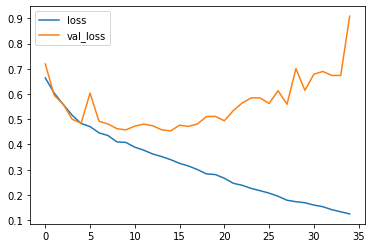

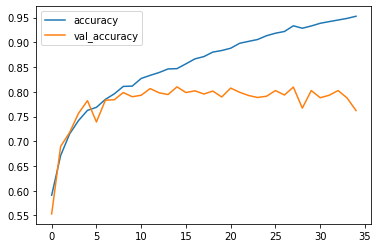

In [22]:
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

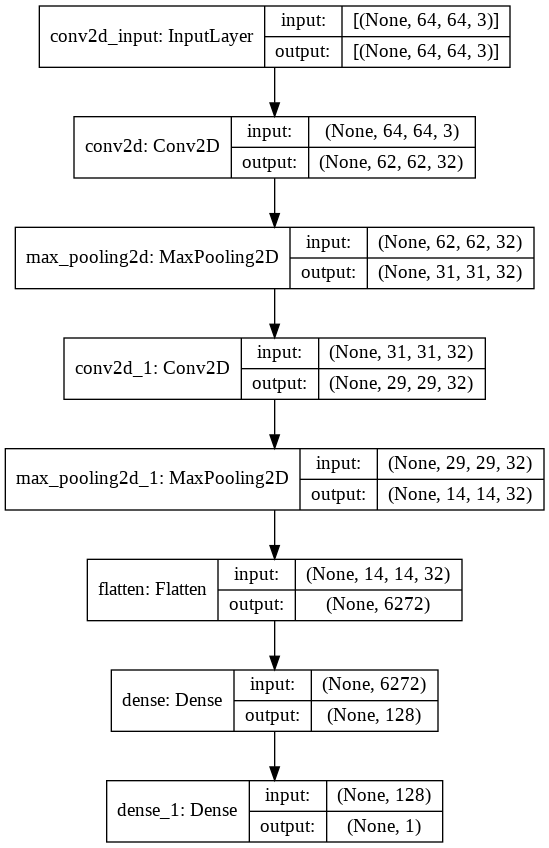

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(classifier, to_file='CNN_model.png', show_shapes=True)

In [24]:
from tensorflow.keras.models import load_model
classifier.save('dog_cat_cnn_model.h5')